# 6. Evaluation techniques

Evaluating a machine learning model is an important step in any task.
Thankfully, scikit-learn makes it incredibly easy to evaluate models.

Before training and evaluating a model, we load the Titanic dataset.

In [1]:
import pandas as pd # import pandas
df = pd.read_csv('data/titanic-train.csv') # read the Titanic dataset into a DataFrame
df.head() # show the first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We'll be training a decision tree classifier later.
Like most other classifiers, the decision tree does not accept missing values, requiring imputation.
The next code cell first copies the DataFrame and then shows us which columns have missing values.

In [2]:
_df = df.copy() # create a copy of the dataset before imputation
_df.info() # print information about the columns, including missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The next code cell prepares the DataFrame for training.
We will ignore some features, including the `Embarked` column, which means we only have to adapt the `Sex` and `Age`.
We first encode the `Sex` column, transforming `female` into 0 and `male` into 1.
Then, we fill in missing values for `Age` with the mean.

In [3]:
from sklearn import preprocessing # import the preprocessing module for feature engineering

label_encoder = preprocessing.LabelEncoder() # create the label encoder
encoding = label_encoder.fit_transform(_df.Sex) # encode the `Sex` feature
_df.Sex = encoding # replace the encoded `Sex` values
print(f"{ [ 0, 1 ] } are { list(label_encoder.inverse_transform([ 0, 1 ])) }")

_df.Age = _df.Age.fillna(_df.Age.mean()) # fill the Age's missing values with the mean
_df.head() # show the first 5 rows

[0, 1] are ['female', 'male']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


## Splitting the dataset

Before training, we need a training and test set.
This operation is very simple, and we can just split the dataset ourselves.
However, scikit-learn provides functions to split the dataset for us.

> Note: The [original Titanic dataset challenge](https://www.kaggle.com/c/titanic) has two files: `train.csv` and `test.csv`.
  We are only using the `train.csv` file, and we are splitting it further into a training set and a test set.
  However, we are only doing it to learn _how_ to split the dataset; normally, you would use the `test.csv` dataset if it's available.

Before splitting the dataset, we'll select the subset of the data we want to use.
We'll use all rows, but only a few of the features.

In [4]:
features = [ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] # the subset of the features we're using
X = _df[ features ] # keep all rows, but only some of the features
y = _df.Survived # keep all the labels in the `Survived` column

To split the dataset, we'll use the  [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from scikit-learn's `model_selection` module.
We'll pass on three parameters: the features, the labels, and the size of the split.
When setting `test_size` to 0.1, we're telling scikit-learn to use 10% of the dataset as test data.
In return, the function returns 4 values:

- `X_train`: The features to use when training
- `X_test`: The features to use when testing
- `y_train`: The labels of the training set
- `y_test`: The labels of the test set

In [5]:
from sklearn import model_selection # import the model selection module, which lets us split datasets

# split the dataset with a 90/10 ratio
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)
print(f"Training set: { X_train.shape }")
print(f"Test set: { X_test.shape }")

Training set: (801, 6)
Test set: (90, 6)


Next, we can train a model; we choose a decision tree.

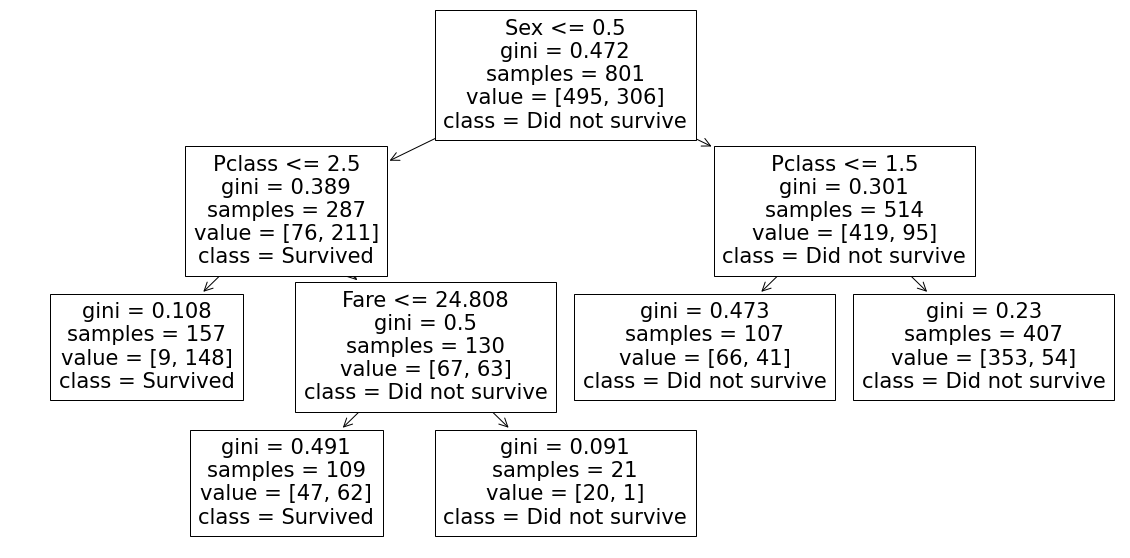

In [6]:
from sklearn import tree # import the tree module
dt = tree.DecisionTreeClassifier(max_leaf_nodes=5) # create the DecisionTreeClassifier
dt = dt.fit(X_train, y_train) # train, or fit, the decision tree

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10)) # create a figure with a size of 20x10
tree.plot_tree(dt, feature_names=features, class_names=[ 'Did not survive', 'Survived' ]) # plot the tree
plt.show() # ... and display it

# Metrics

Evaluating the classifier is even simpler.
There are just two steps after splitting the dataset:

1. Predict the labels using the classifier we trained previously.
   We will be scoring these labels to evaluating the classifier's quality.
2. Use any scoring function from scikit-learn's `metrics` module.

To make predictions with any scikit-learn module, we need to use the `predict` function, passing on the test features as the first parameter.
We can also predict the probability of each observation belonging to each class using the `predict_proba` function if algorithm the supports it.

We'll predict all of the unseen examples (the test set) in one go by passing all rows at once.
In turn, the model will give us one prediction for each row.

In [7]:
y_pred = dt.predict(X_test) # predict the labels of the unseen observations
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0], dtype=int64)

All evaluation methods are in scikit-learn's [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module.
All we have to do is choose a metric, and provide the actual test labels and the predicted test labels as parameters.

For example, if precision is 90%, it means that when the model predicts a passenger survived, 9 times out of 10 they actually survived.

In [8]:
from sklearn import metrics # import the metrics module
print(f"Accuracy: { round(metrics.accuracy_score(y_test, y_pred) * 100, 2) }%")
print(f"Precision: { round(metrics.precision_score(y_test, y_pred) * 100, 2) }%")
print(f"Recall: { round(metrics.recall_score(y_test, y_pred) * 100, 2) }%")
print(f"F-measure: { round(metrics.f1_score(y_test, y_pred) * 100, 2) }%")

Accuracy: 78.89%
Precision: 84.0%
Recall: 58.33%
F-measure: 68.85%


We can use the metrics module in similar fashion to come up with the consufion matrix.
The confusion matrix has two rows and columns in our case because a passenger either survived or did not survive:

- The first row is the number of passengers who did not survive
- The second row is the number of the passengers who survived
- The first column is the number of passengers that the model predicts did not survive
- The second column is the number of passengers that the model predicts survived

In [9]:
print(metrics.confusion_matrix(y_test, y_pred))

[[50  4]
 [15 21]]


That is still quite confusing.
Thankfully, scikit-learn also includes a heatmap depiction of the confusion matrix.

This time, we need to provide the trained classifier, the test data (features), and the actual test labels.
The confusion matrix will predict the values anew.
We also add the display labels to make it easier for us to interpret the heatmap.

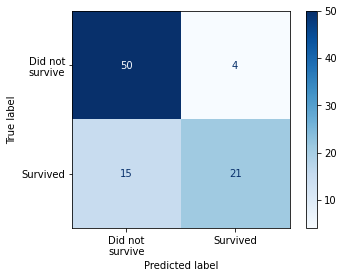

In [10]:
metrics.plot_confusion_matrix(dt, X_test, y_test, # the classifier will predict the labels anew
                              display_labels=[ 'Did not\nsurvive', 'Survived' ], # our classes (0=did not survive, 1 = survived)
                              cmap=plt.cm.Blues) # the color map to use
plt.show() # show the confusion matrix

## Resources

scikit-learn includes many more metrics for evaluation.
The following are a short list of some of the other metrics you can use:

- [The ROC curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)
- [The AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)
- [The Davies-Bouldin score, a clustering validity index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html)